In [1]:
import pandas as pd
df = pd.read_csv('../migration.csv')
print(df.shape)
df.head()

(160781, 11)


Country Origin Name Country Origin Code Migration by Gender Name  \
0         Afghanistan                 AFG                    Total   
1         Afghanistan                 AFG                    Total   
2         Afghanistan                 AFG                    Total   
3         Afghanistan                 AFG                    Total   
4         Afghanistan                 AFG                    Total   

  Migration by Gender Code Country Dest Name Country Dest Code 1960 [1960]  \
0                      TOT       Afghanistan               AFG           0   
1                      TOT           Albania               ALB           0   
2                      TOT           Algeria               DZA          41   
3                      TOT    American Samoa               ASM           0   
4                      TOT           Andorra               AND           0   

  1970 [1970] 1980 [1980] 1990 [1990] 2000 [2000]  
0           0           0           0           0  
1           0           0           0           0  
2          16          13          10           8  
3           0           0           0           0  
4           0           2           5           6

In [2]:
df.rename(columns=lambda x: x.split(' ')[0] if x.endswith(']') else x, inplace=True)

In [3]:
import pandas as pd
import plotly.express as px

In [4]:
df = df[~df.isna().any(axis = 1)]

In [5]:
df.shape

(160776, 11)

In [6]:
df[['1960', '1970', '1980', '1990', '2000']] = df[['1960', '1970', '1980', '1990', '2000']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [7]:
df.shape

(160776, 11)

In [8]:
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1) #.astype(int)

In [9]:
df['Total Migration']

0              0
1              0
2             88
3              0
4             13
           ...  
160771         0
160772         0
160773         0
160774    134643
160775         0
Name: Total Migration, Length: 160776, dtype: int64

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)
source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(10)

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


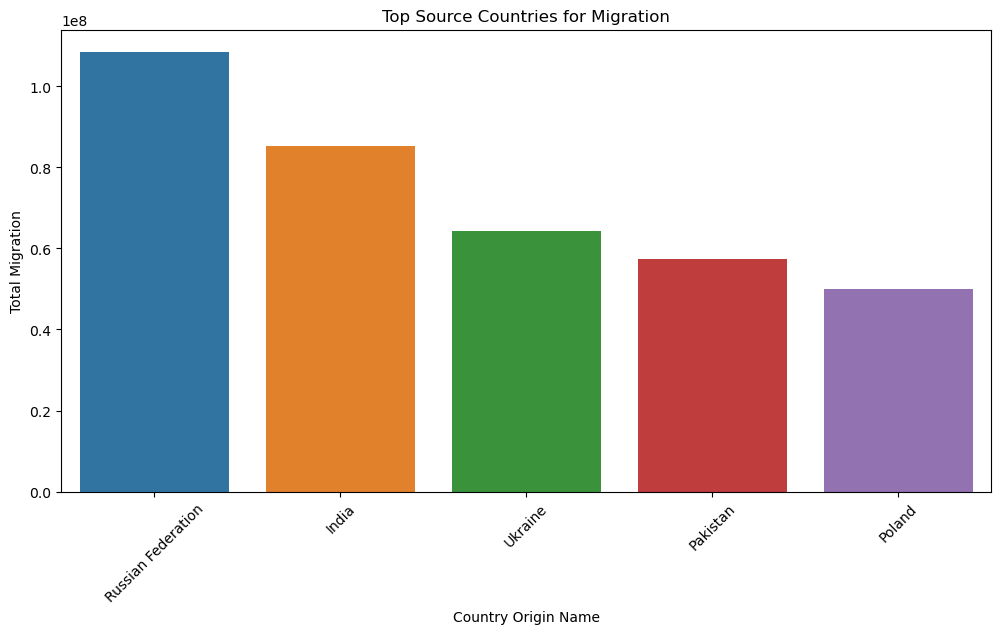

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


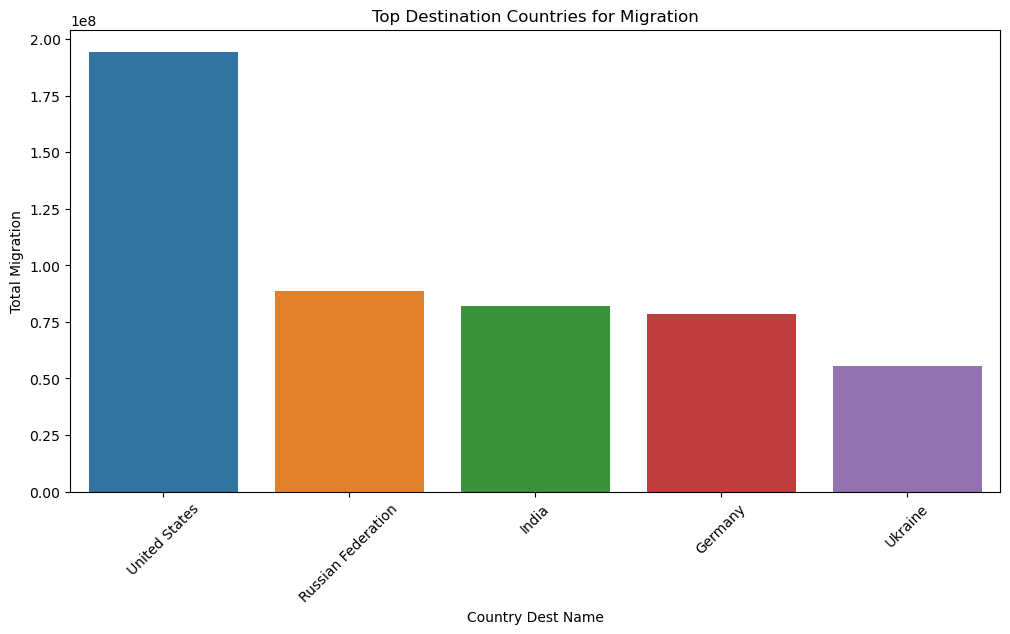

In [11]:
# 1. Primary source countries for migration
source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Origin Name', y='Total Migration', data=source_migration)
plt.title('Top Source Countries for Migration')
plt.xticks(rotation=45)
plt.show()

# 2. Primary destination countries for migration
dest_migration = df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Dest Name', y='Total Migration', data=dest_migration)
plt.title('Top Destination Countries for Migration')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.head()

Country Origin Name Country Origin Code Migration by Gender Name  \
0         Afghanistan                 AFG                    Total   
1         Afghanistan                 AFG                    Total   
2         Afghanistan                 AFG                    Total   
3         Afghanistan                 AFG                    Total   
4         Afghanistan                 AFG                    Total   

  Migration by Gender Code Country Dest Name Country Dest Code  1960  1970  \
0                      TOT       Afghanistan               AFG     0     0   
1                      TOT           Albania               ALB     0     0   
2                      TOT           Algeria               DZA    41    16   
3                      TOT    American Samoa               ASM     0     0   
4                      TOT           Andorra               AND     0     0   

   1980  1990  2000  Total Migration  
0     0     0     0                0  
1     0     0     0                0  
2    13    10     8               88  
3     0     0     0                0  
4     2     5     6               13

## GPT VIZ

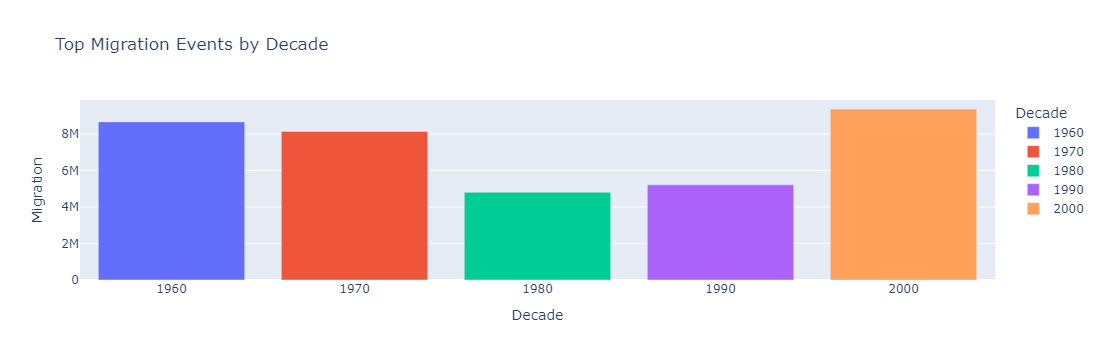

In [12]:
import pandas as pd
import plotly.express as px

# Assuming df is already loaded

# Find the top migration event for each decade
top_migrations = df.loc[df[['1960', '1970', '1980', '1990', '2000']].idxmax()]

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig = px.bar(top_migrations, x='Decade', y='Migration', color='Decade', 
             hover_data={'Country Origin Name': True, 'Country Dest Name': True, 'Migration': True},
             labels={'Country Origin Name': 'Source Country', 'Country Dest Name': 'Destination Country'},
             title='Top Migration Events by Decade')

# Show the plot
fig.show()

# Save the plot
fig.write_html('top_migration_events.html')

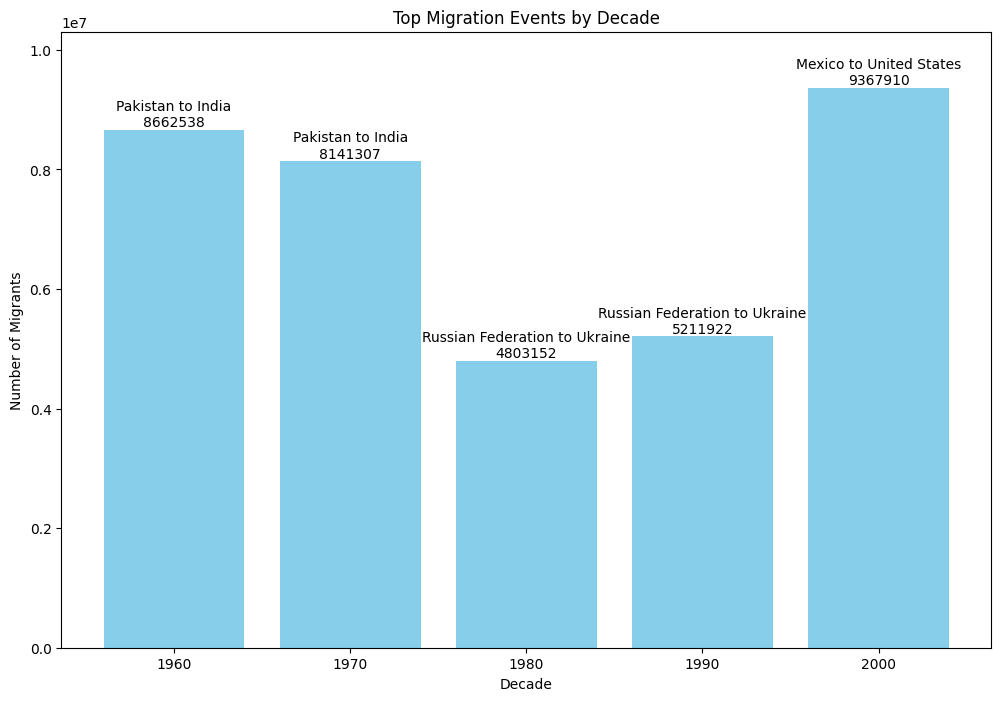

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
bars = ax.bar(top_migrations['Decade'], top_migrations['Migration'], color='skyblue')

# Adding annotations
for bar, migration, origin, dest in zip(bars, top_migrations['Migration'], top_migrations['Country Origin Name'], top_migrations['Country Dest Name']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{origin} to {dest}\n{int(migration)}', ha='center', va='bottom', fontsize=10)

# Setting labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Migrants')
ax.set_title('Top Migration Events by Decade')
ax.set_ylim(0, top_migrations['Migration'].max() * 1.1)

# Save the plot
plt.savefig('top_migration_events.png')

# Show the plot
plt.show()


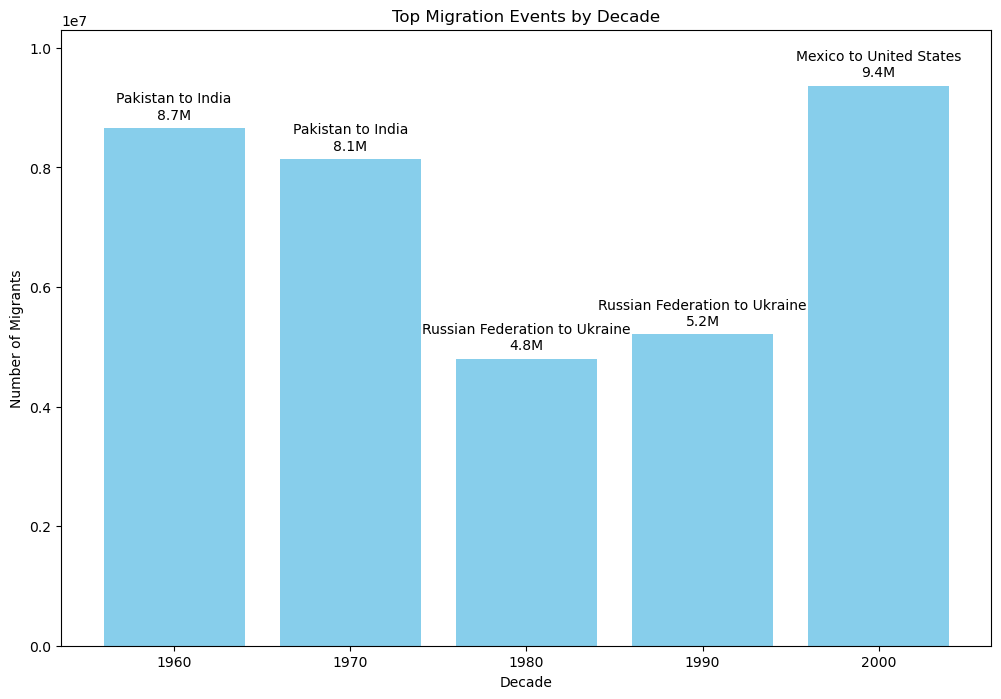

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
bars = ax.bar(top_migrations['Decade'], top_migrations['Migration'], color='skyblue')

# Adding annotations with formatted numbers in millions
for bar, migration, origin, dest in zip(bars, top_migrations['Migration'], top_migrations['Country Origin Name'], top_migrations['Country Dest Name']):
    yval = bar.get_height()
    formatted_migration = f'{migration / 1e6:.1f}M'
    ax.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'{origin} to {dest}\n{formatted_migration}', ha='center', va='bottom', fontsize=10)

# Setting labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Migrants')
ax.set_title('Top Migration Events by Decade')
ax.set_ylim(0, top_migrations['Migration'].max() * 1.1)

# Save the plot
plt.savefig('top_migration_events.png')

# Show the plot
plt.show()


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



def gpt_describe(image_path, query):
    # Path to the image in your Google Drive
    

    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    import base64
    import requests

    # OpenAI API Key
    api_key = ""

    # Function to encode the image
    def encode_image(image_path):
      with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')



    # Getting the base64 string
    base64_image = encode_image(image_path)


    #query = "This image contains a set of images. What are some Operational Design Domain attributes that could describe them. Provide in Json format"
    print(query)
    print()
    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": query
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              }
            }
          ]
        }
      ],
      "max_tokens": 500
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    
    
    return response

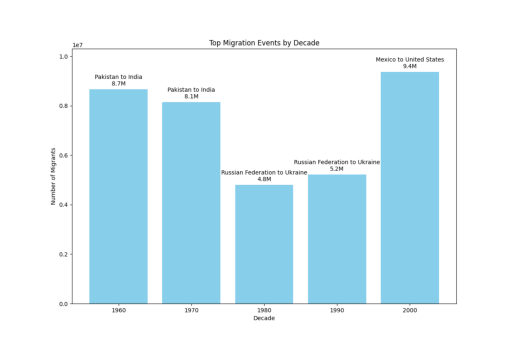

What is some historical significance behind the events in the image? Give short three or four line answer.



<Response [200]>

In [51]:
gpt_describe('top_migration_events.png', 'What is some historical significance behind the events in the image? Give short three or four line answer.')

In [15]:
response

NameError: name 'response' is not defined

In [16]:
import base64
import requests

# OpenAI API Key
api_key = ""

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "top_migration_events.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-9gHZWs9gkWoPXXiJ3mcmD3h4FMoiK', 'object': 'chat.completion', 'created': 1719864350, 'model': 'gpt-4o-2024-05-13', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'This image is a bar chart titled "Top Migration Events by Decade." The y-axis is labeled "Number of Migrants," and the x-axis is labeled "Decade." The chart displays data for five decades, and each bar represents a significant migration event for that decade. The events and their corresponding numbers of migrants are:\n\n- 1960: Pakistan to India, 8.7M\n- 1970: Pakistan to India, 8.1M\n- 1980: Russian Federation to Ukraine, 4.8M\n- 1990: Russian Federation to Ukraine, 5.2M\n- 2000: Mexico to United States, 9.4M\n\nEach event is labeled on the chart with the number of migrants mentioned above the corresponding bar.'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 1118, 'completion_tokens': 162, 'total_tokens': 1280}, 'system_fingerprint': 'fp_4008e3b719'}


In [20]:
print('This image is a bar chart titled "Top Migration Events by Decade." The y-axis is labeled "Number of Migrants," and the x-axis is labeled "Decade." The chart displays data for five decades, and each bar represents a significant migration event for that decade. The events and their corresponding numbers of migrants are:\n\n- 1960: Pakistan to India, 8.7M\n- 1970: Pakistan to India, 8.1M\n- 1980: Russian Federation to Ukraine, 4.8M\n- 1990: Russian Federation to Ukraine, 5.2M\n- 2000: Mexico to United States, 9.4M\n\nEach event is labeled on the chart with the number of migrants mentioned above the corresponding bar.')

This image is a bar chart titled "Top Migration Events by Decade." The y-axis is labeled "Number of Migrants," and the x-axis is labeled "Decade." The chart displays data for five decades, and each bar represents a significant migration event for that decade. The events and their corresponding numbers of migrants are:

- 1960: Pakistan to India, 8.7M
- 1970: Pakistan to India, 8.1M
- 1980: Russian Federation to Ukraine, 4.8M
- 1990: Russian Federation to Ukraine, 5.2M
- 2000: Mexico to United States, 9.4M

Each event is labeled on the chart with the number of migrants mentioned above the corresponding bar.


In [22]:
import base64
import requests

# OpenAI API Key


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "top_migration_events.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is some historical significance behind the events in the image? Give short three or four line answer."
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-9gHbF6dXdXP2eBX1vc11FNZWzcIeZ', 'object': 'chat.completion', 'created': 1719864457, 'model': 'gpt-4o-2024-05-13', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The graph highlights significant migration events by decade. The migration from Pakistan to India in the 1960s and 1970s is closely tied to the Partition of India in 1947, leading to large-scale population exchanges. The migratory trends from the Russian Federation to Ukraine in the 1980s and 1990s were influenced by the dissolution of the Soviet Union in 1991. Lastly, the migration from Mexico to the United States in the 2000s reflects ongoing economic and social factors driving migration patterns between these neighboring countries.'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 1132, 'completion_tokens': 111, 'total_tokens': 1243}, 'system_fingerprint': 'fp_4008e3b719'}


In [23]:
print(response.json()['choices'][0]['message']['content'])

The graph highlights significant migration events by decade. The migration from Pakistan to India in the 1960s and 1970s is closely tied to the Partition of India in 1947, leading to large-scale population exchanges. The migratory trends from the Russian Federation to Ukraine in the 1980s and 1990s were influenced by the dissolution of the Soviet Union in 1991. Lastly, the migration from Mexico to the United States in the 2000s reflects ongoing economic and social factors driving migration patterns between these neighboring countries.


In [24]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [25]:
df_relevant = df[['Country Origin Name', 'Country Dest Name', '1960', '1970', '1980', '1990', '2000']]

# Pivot the DataFrame
pivot_df = df_relevant.set_index(['Country Origin Name', 'Country Dest Name'])

# Function to identify up and down trends
def has_fluctuating_trend(migration_counts):
    trend = []
    for i in range(1, len(migration_counts)):
        if migration_counts[i] > migration_counts[i-1]:
            trend.append('up')
        elif migration_counts[i] < migration_counts[i-1]:
            trend.append('down')
        else:
            trend.append('stable')
    
    # Check for the presence of both 'up' and 'down' in the trend list
    return 'up' in trend and 'down' in trend

# Apply the function to identify origin-destination pairs with fluctuating trends
fluctuating_trends = pivot_df.apply(lambda row: has_fluctuating_trend(row.dropna().values), axis=1)

# Filter the pairs with fluctuating trends
fluctuating_pairs = pivot_df[fluctuating_trends]

print(fluctuating_pairs)


                                       1960  1970   1980   1990   2000
Country Origin Name Country Dest Name                                 
Afghanistan         Argentina             6     9     13     21      0
                    Bahamas, The          0     0      1      0      0
                    Bahrain              62    61  13384  22519  34419
                    Bangladesh          151   119    132    144    158
                    Belgium              16    91     41    229    209
...                                     ...   ...    ...    ...    ...
Zimbabwe            Tanzania            847   769    267      5    402
                    Tonga                 0     0      0      2      0
                    Uganda                4     4     20     41      4
                    Vanuatu               0     0      0      2      1
                    Venezuela, RB         0     0      2      1      7

[41409 rows x 5 columns]


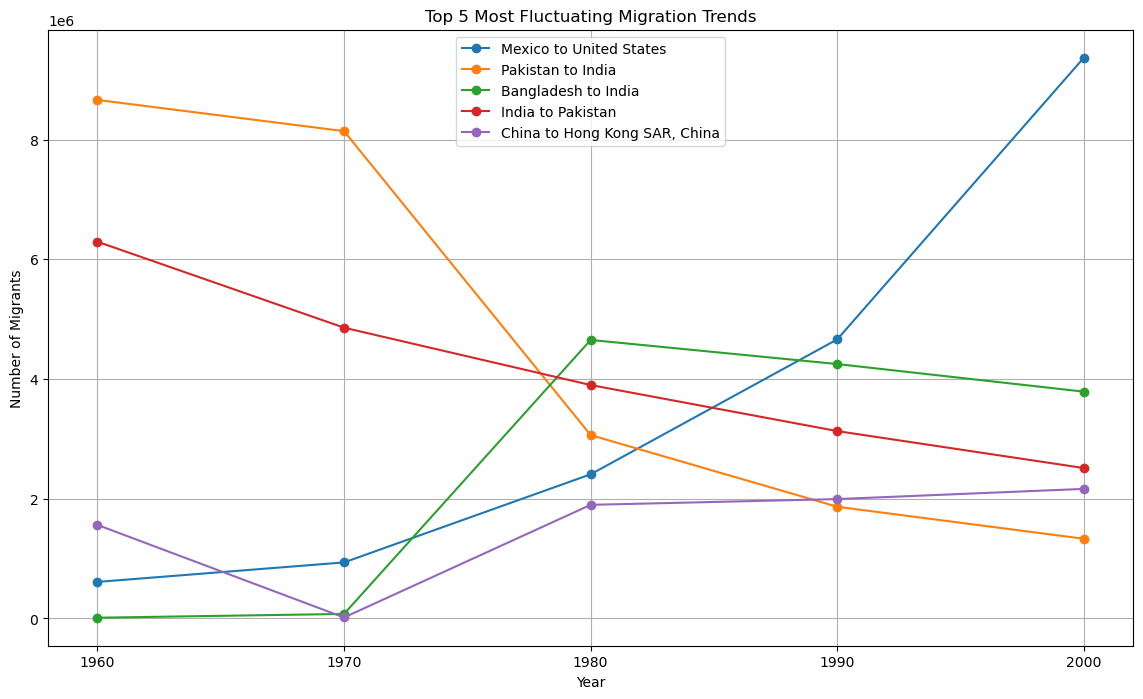

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate fluctuation as the sum of absolute differences between consecutive years
decade_cols = ['1960', '1970', '1980', '1990', '2000']
df['Fluctuation'] = df[decade_cols].diff(axis=1).abs().sum(axis=1)

# Identify the single destination country for each source country with the highest fluctuation
idx = df.groupby('Country Origin Name')['Fluctuation'].idxmax()
top_fluctuations = df.loc[idx]

# Identify the top 5 most fluctuating trends
top_5_fluctuations = top_fluctuations.nlargest(5, 'Fluctuation')

# Plot the top 5 most fluctuating trends
fig, ax = plt.subplots(figsize=(14, 8))

for i, row in top_5_fluctuations.iterrows():
    ax.plot(decade_cols, row[decade_cols], marker='o', label=f"{row['Country Origin Name']} to {row['Country Dest Name']}")

ax.set_xlabel('Year')
ax.set_ylabel('Number of Migrants')
ax.set_title('Top 5 Most Fluctuating Migration Trends')
ax.legend()
plt.grid(True)
plt.savefig('top_5_fluctuating_trends.png')
plt.show()


In [29]:
import pandas as pd

# Assuming your DataFrame is named df and already loaded
# Select relevant columns and set multi-index with origin and destination
df_relevant = df[['Country Origin Name', 'Country Dest Name', '1960', '1970', '1980', '1990', '2000']]

# Pivot the DataFrame
pivot_df = df_relevant.set_index(['Country Origin Name', 'Country Dest Name'])

# Function to calculate fluctuation score
def calculate_fluctuation_score(migration_counts):
    score = 0
    for i in range(1, len(migration_counts)):
        score += abs(migration_counts[i] - migration_counts[i-1])
    return score

# Apply the function to calculate fluctuation scores
fluctuation_scores = pivot_df.apply(lambda row: calculate_fluctuation_score(row.dropna().values), axis=1)

# Add the scores to the pivoted DataFrame
pivot_df['Fluctuation Score'] = fluctuation_scores

# Reset the index to work with the DataFrame more easily
pivot_df_reset = pivot_df.reset_index()

# Select the single destination with the highest fluctuation score for each origin
single_destinations = pivot_df_reset.loc[pivot_df_reset.groupby('Country Origin Name')['Fluctuation Score'].idxmax()]

# Identify the top 5 most fluctuating trends
top_5_fluctuating = single_destinations.nlargest(5, 'Fluctuation Score')

print(top_5_fluctuating)


       Country Origin Name     Country Dest Name     1960     1970     1980  \
91694               Mexico         United States   610787   936424  2408502   
108892            Pakistan                 India  8662538  8141307  3063529   
11179           Bangladesh                 India    12501    75838  4653065   
63220                India              Pakistan  6293916  4858023  3899706   
28501                China  Hong Kong SAR, China  1562528    16823  1898285   

           1990     2000  Fluctuation Score  
91694   4662233  9367910            8757123  
108892  1866445  1331659            7330879  
11179   4250287  3789377            5504252  
63220   3130431  2512906            3781010  
28501   1994591  2164744            3693626  


In [30]:
import pandas as pd

# Assuming your DataFrame is named df and already loaded
# Select relevant columns and set multi-index with origin and destination
df_relevant = df[['Country Origin Name', 'Country Dest Name', '1960', '1970', '1980', '1990', '2000']]

# Pivot the DataFrame
pivot_df = df_relevant.set_index(['Country Origin Name', 'Country Dest Name'])

# Function to calculate fluctuation score based on direction changes
def calculate_fluctuation_score(migration_counts):
    trend = []
    score = 0
    for i in range(1, len(migration_counts)):
        if migration_counts[i] > migration_counts[i-1]:
            trend.append('up')
        elif migration_counts[i] < migration_counts[i-1]:
            trend.append('down')
        # Count direction changes
        if len(trend) > 1 and trend[-1] != trend[-2]:
            score += 1
    # Only return score if there is at least one up and one down trend
    if 'up' in trend and 'down' in trend:
        return score
    else:
        return 0

# Apply the function to calculate fluctuation scores
fluctuation_scores = pivot_df.apply(lambda row: calculate_fluctuation_score(row.dropna().values), axis=1)

# Add the scores to the pivoted DataFrame
pivot_df['Fluctuation Score'] = fluctuation_scores

# Reset the index to work with the DataFrame more easily
pivot_df_reset = pivot_df.reset_index()

# Filter out rows with a fluctuation score of 0 (only consistent trends)
pivot_df_reset = pivot_df_reset[pivot_df_reset['Fluctuation Score'] > 0]

# Select the single destination with the highest fluctuation score for each origin
single_destinations = pivot_df_reset.loc[pivot_df_reset.groupby('Country Origin Name')['Fluctuation Score'].idxmax()]

# Identify the top 5 most fluctuating trends
top_5_fluctuating = single_destinations.nlargest(5, 'Fluctuation Score')

print(top_5_fluctuating)


     Country Origin Name Country Dest Name  1960  1970  1980  1990  2000  \
19           Afghanistan           Belgium    16    91    41   229   209   
708              Albania           Bahrain     2     1     4     2     2   
1426             Algeria             Chile    17    68    15    45    43   
2153      American Samoa           Germany    13    10    14     4   246   
2784             Andorra           Austria     2     4     0     0     0   

      Fluctuation Score  
19                    3  
708                   3  
1426                  3  
2153                  3  
2784                  3  


In [31]:
single_destinations.nlargest(20, 'Fluctuation Score')

Country Origin Name Country Dest Name   1960  1970  1980  1990   2000  \
19             Afghanistan           Belgium     16    91    41   229    209   
708                Albania           Bahrain      2     1     4     2      2   
1426               Algeria             Chile     17    68    15    45     43   
2153        American Samoa           Germany     13    10    14     4    246   
2784               Andorra           Austria      2     4     0     0      0   
3492                Angola            Brazil   2947   780  7001  4835   6331   
4865   Antigua and Barbuda      Bahamas, The     48    31    32    16     17   
5612             Argentina            France  10669  1067  9699  9508  17999   
6305               Armenia            France   1755   175   376    51   2961   
7028                 Aruba             Italy      0     2     0     0      0   
7650             Australia            Brazil   1297     9   611   295    445   
8331               Austria           Bahrain     10     4    15     9      9   
9020            Azerbaijan         Australia    132   299   144   629    143   
9714          Bahamas, The           Austria      0     1     0     0      7   
10476              Bahrain              Guam      0     1     0     0      0   
11129           Bangladesh             China     30    24   212   181    941   
11803             Barbados           Bermuda      8    31    17   272    267   
12486              Belarus           Austria     83    13    47     0    373   
13182              Belgium           Bahrain      5     2     8     5      5   
13872               Belize           Austria      0     1     0     0      8   

       Fluctuation Score  
19                     3  
708                    3  
1426                   3  
2153                   3  
2784                   3  
3492                   3  
4865                   3  
5612                   3  
6305                   3  
7028                   3  
7650                   3  
8331                   3  
9020                   3  
9714                   3  
10476                  3  
11129                  3  
11803                  3  
12486                  3  
13182                  3  
13872                  3

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named df and already loaded
# Select relevant columns and set multi-index with origin and destination
df_relevant = df[['Country Origin Name', 'Country Dest Name', '1960', '1970', '1980', '1990', '2000']]

# Pivot the DataFrame
pivot_df = df_relevant.set_index(['Country Origin Name', 'Country Dest Name'])

# Function to calculate fluctuation score based on direction changes
def calculate_fluctuation_score(migration_counts):
    trend = []
    score = 0
    for i in range(1, len(migration_counts)):
        if migration_counts[i] > migration_counts[i-1]:
            trend.append('up')
        elif migration_counts[i] < migration_counts[i-1]:
            trend.append('down')
        # Count direction changes
        if len(trend) > 1 and trend[-1] != trend[-2]:
            score += 1
    # Only return score if there is at least one up and one down trend
    if 'up' in trend and 'down' in trend:
        return score
    else:
        return 0

# Apply the function to calculate fluctuation scores
pivot_df['Fluctuation Score'] = pivot_df.apply(lambda row: calculate_fluctuation_score(row.dropna().values), axis=1)

# Calculate total migration for each origin-destination pair
pivot_df['Total Migration'] = pivot_df.sum(axis=1)

# Filter out rows with a fluctuation score of 0 (only consistent trends)
pivot_df = pivot_df[pivot_df['Fluctuation Score'] > 0]

# Normalize both Fluctuation Score and Total Migration
scaler = MinMaxScaler()
pivot_df[['Normalized Fluctuation Score', 'Normalized Total Migration']] = scaler.fit_transform(pivot_df[['Fluctuation Score', 'Total Migration']])

# Combine metrics into a single score (weighted sum)
weight_fluctuation = 0.5
weight_migration = 0.5
pivot_df['Combined Score'] = (weight_fluctuation * pivot_df['Normalized Fluctuation Score'] + 
                              weight_migration * pivot_df['Normalized Total Migration'])

# Reset the index to work with the DataFrame more easily
pivot_df_reset = pivot_df.reset_index()

# Select the single destination with the highest combined score for each origin
single_destinations = pivot_df_reset.loc[pivot_df_reset.groupby('Country Origin Name')['Combined Score'].idxmax()]

# Identify the top 5 most fluctuating and significant trends
top_5_fluctuating = single_destinations.nlargest(5, 'Combined Score')


print(top_5_fluctuating)


      Country Origin Name     Country Dest Name     1960     1970     1980  \
38272             Ukraine    Russian Federation  3500317  3486564  3811434   
29354              Poland               Germany  1112903  1107802  1219483   
6108               Canada         United States   995660   964010  1001367   
582               Algeria                France   201387   632298   630419   
22267    Macao SAR, China  Hong Kong SAR, China    13355  1625889     8553   

          1990     2000  Fluctuation Score  Total Migration  \
38272  4595811  3559975                  2         18954103   
29354   996274  1028120                  3          5464585   
6108    914902   950549                  3          4826491   
582     652025   535456                  3          2651588   
22267   144908    69229                  3          1861937   

       Normalized Fluctuation Score  Normalized Total Migration  \
38272                           0.5                    0.900671   
29354             

In [35]:
top_5_fluctuating

Country Origin Name     Country Dest Name     1960     1970     1980  \
38272             Ukraine    Russian Federation  3500317  3486564  3811434   
29354              Poland               Germany  1112903  1107802  1219483   
6108               Canada         United States   995660   964010  1001367   
582               Algeria                France   201387   632298   630419   
22267    Macao SAR, China  Hong Kong SAR, China    13355  1625889     8553   

          1990     2000  Fluctuation Score  Total Migration  \
38272  4595811  3559975                  2         18954103   
29354   996274  1028120                  3          5464585   
6108    914902   950549                  3          4826491   
582     652025   535456                  3          2651588   
22267   144908    69229                  3          1861937   

       Normalized Fluctuation Score  Normalized Total Migration  \
38272                           0.5                    0.900671   
29354                           1.0                    0.259669   
6108                            1.0                    0.229348   
582                             1.0                    0.125999   
22267                           1.0                    0.088476   

       Combined Score  
38272        0.700336  
29354        0.629835  
6108         0.614674  
582          0.563000  
22267        0.544238

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named df and already loaded
# Select relevant columns and set multi-index with origin and destination
df_relevant = df[['Country Origin Name', 'Country Dest Name', '1960', '1970', '1980', '1990', '2000']]

# Pivot the DataFrame
pivot_df = df_relevant.set_index(['Country Origin Name', 'Country Dest Name'])

# Function to calculate fluctuation score based on direction changes
def calculate_fluctuation_score(migration_counts):
    trend = []
    score = 0
    for i in range(1, len(migration_counts)):
        if migration_counts[i] > migration_counts[i-1]:
            trend.append('up')
        elif migration_counts[i] < migration_counts[i-1]:
            trend.append('down')
        # Count direction changes
        if len(trend) > 1 and trend[-1] != trend[-2]:
            score += 1
    # Only return score if there is at least one up and one down trend
    if 'up' in trend and 'down' in trend:
        return score
    else:
        return 0

# Apply the function to calculate fluctuation scores
pivot_df['Fluctuation Score'] = pivot_df.apply(lambda row: calculate_fluctuation_score(row.dropna().values), axis=1)

# Calculate total migration for each origin-destination pair
pivot_df['Total Migration'] = pivot_df.sum(axis=1)

# Filter out rows with a fluctuation score of 0 (only consistent trends)
pivot_df = pivot_df[pivot_df['Fluctuation Score'] > 0]

# Normalize both Fluctuation Score and Total Migration
scaler = MinMaxScaler()
pivot_df[['Normalized Fluctuation Score', 'Normalized Total Migration']] = scaler.fit_transform(pivot_df[['Fluctuation Score', 'Total Migration']])

# Combine metrics into a single score (weighted sum)
weight_fluctuation = 0.5
weight_migration = 0.5
pivot_df['Combined Score'] = (weight_fluctuation * pivot_df['Normalized Fluctuation Score'] + 
                              weight_migration * pivot_df['Normalized Total Migration'])

# Reset the index to work with the DataFrame more easily
pivot_df_reset = pivot_df.reset_index()

# Select the single destination with the highest combined score for each origin
single_destinations = pivot_df_reset.loc[pivot_df_reset.groupby('Country Origin Name')['Combined Score'].idxmax()]

# Identify the top 5 most fluctuating and significant trends
top_5_fluctuating = single_destinations.nlargest(5, 'Combined Score')

# Print the top 5
print(top_5_fluctuating)


      Country Origin Name     Country Dest Name     1960     1970     1980  \
38272             Ukraine    Russian Federation  3500317  3486564  3811434   
29354              Poland               Germany  1112903  1107802  1219483   
6108               Canada         United States   995660   964010  1001367   
582               Algeria                France   201387   632298   630419   
22267    Macao SAR, China  Hong Kong SAR, China    13355  1625889     8553   

          1990     2000  Fluctuation Score  Total Migration  \
38272  4595811  3559975                  2         18954103   
29354   996274  1028120                  3          5464585   
6108    914902   950549                  3          4826491   
582     652025   535456                  3          2651588   
22267   144908    69229                  3          1861937   

       Normalized Fluctuation Score  Normalized Total Migration  \
38272                           0.5                    0.900671   
29354             

In [43]:
top_5_fluctuating

Country Origin Name     Country Dest Name     1960     1970     1980  \
0             Ukraine    Russian Federation  3500317  3486564  3811434   
1              Poland               Germany  1112903  1107802  1219483   
2              Canada         United States   995660   964010  1001367   
3             Algeria                France   201387   632298   630419   
4    Macao SAR, China  Hong Kong SAR, China    13355  1625889     8553   

      1990     2000  Fluctuation Score  Total Migration  \
0  4595811  3559975                  2         18954103   
1   996274  1028120                  3          5464585   
2   914902   950549                  3          4826491   
3   652025   535456                  3          2651588   
4   144908    69229                  3          1861937   

   Normalized Fluctuation Score  Normalized Total Migration  Combined Score  
0                           0.5                    0.900671        0.700336  
1                           1.0                    0.259669        0.629835  
2                           1.0                    0.229348        0.614674  
3                           1.0                    0.125999        0.563000  
4                           1.0                    0.088476        0.544238

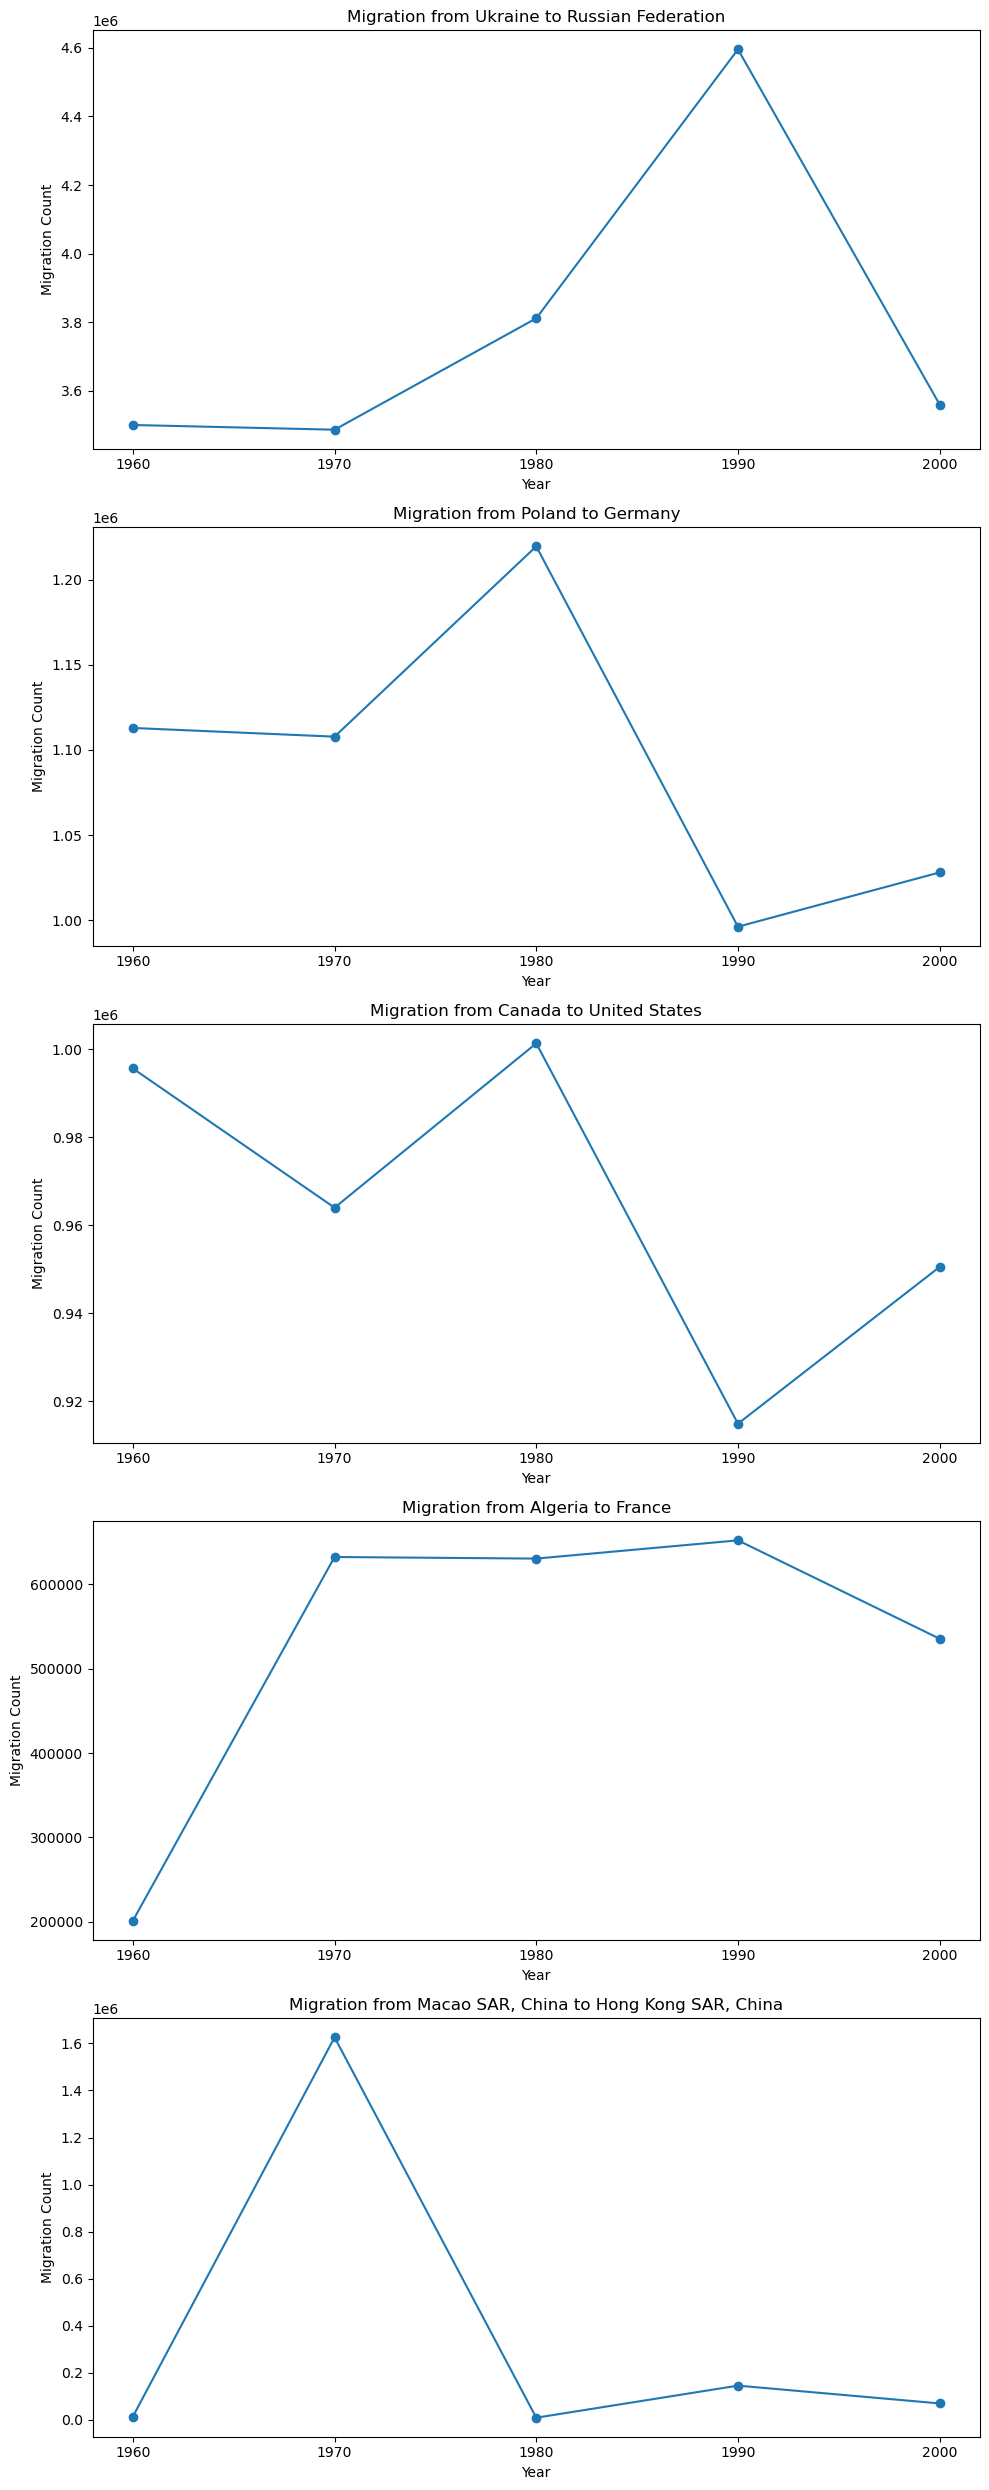

In [45]:
fig, axs = plt.subplots(5, 1, figsize=(10, 25))
for i in range(len(top_5_fluctuating)):
    row = top_5_fluctuating.iloc[i]
    origin = row['Country Origin Name']
    destination = row['Country Dest Name']
    years = ['1960', '1970', '1980', '1990', '2000']
    migration_counts = row[years].values
    axs[i].plot(years, migration_counts, marker='o')
    axs[i].set_title(f'Migration from {origin} to {destination}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Migration Count')

plt.tight_layout()
plt.show()

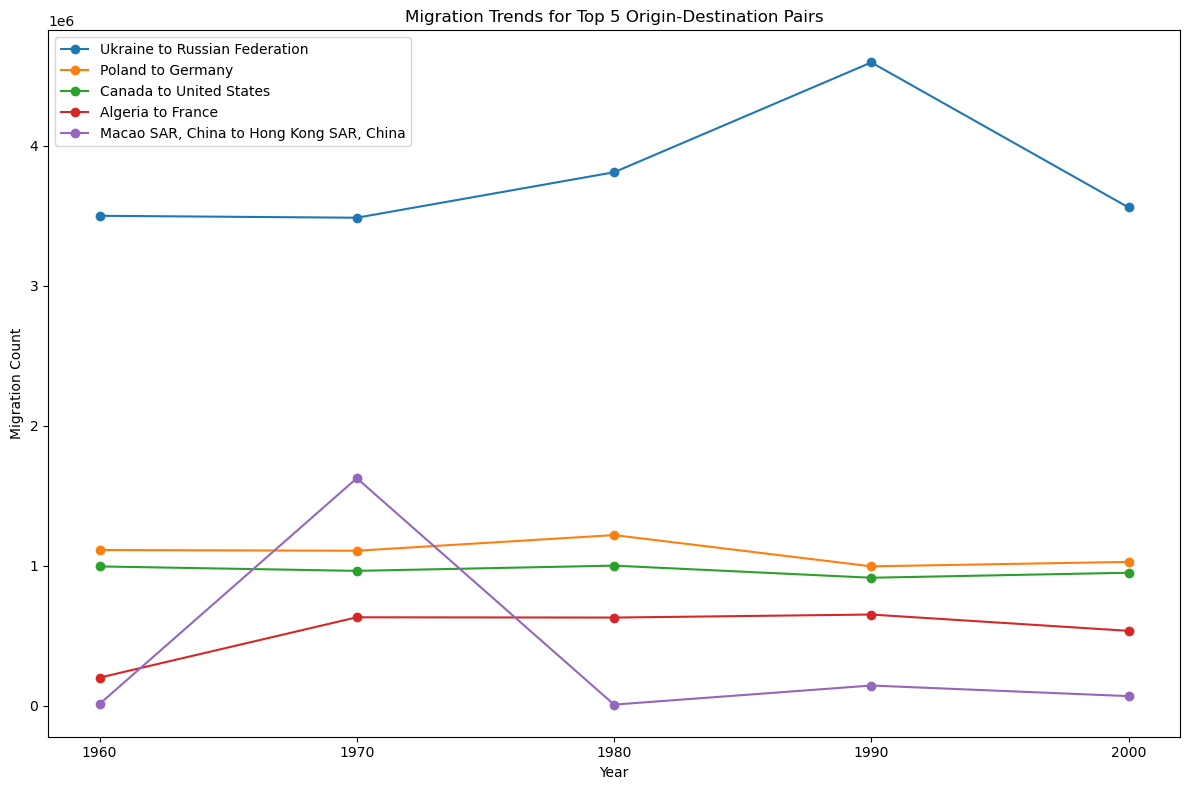

In [48]:
plt.figure(figsize=(12, 8))

for i in range(len(top_5_fluctuating)):
    row = top_5_fluctuating.iloc[i]
    origin = row['Country Origin Name']
    destination = row['Country Dest Name']
    years = ['1960', '1970', '1980', '1990', '2000']
    migration_counts = row[years].values
    plt.plot(years, migration_counts, marker='o', label=f'{origin} to {destination}')

plt.title('Migration Trends for Top 5 Origin-Destination Pairs')
plt.xlabel('Year')
plt.ylabel('Migration Count')
plt.legend()
plt.tight_layout()
plt.savefig('top_fluctuating_migrations.png')
plt.show()

In [50]:
import base64
import requests

def query_image_with_openai(image_path, query, api_key):
    # Function to encode the image
    def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    payload = {
        "model": "gpt-4o",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": query
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        }
                    }
                ]
            }
        ],
        "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    return response.json()

# Example usage

image_path = "top_fluctuating_migrations.png"
query = "What is some historical significance behind the events in the image? Give short three or four line answer."

response = query_image_with_openai(image_path, query, api_key)
print(response)


{'id': 'chatcmpl-9gIcSDzxielgS4By6vT9TNU5NSQLZ', 'object': 'chat.completion', 'created': 1719868376, 'model': 'gpt-4o-2024-05-13', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "The migration trends in the graph reflect significant historical events. The increase in migration from Ukraine to the Russian Federation around 1990 reflects the dissolution of the Soviet Union. The stable migration from Poland to Germany and Canada to the United States reflects ongoing economic opportunities. The spike in migration from Macao SAR to Hong Kong SAR around 1970 might be related to China's political changes, while the Algeria to France trend mirrors post-colonial migration impacts."}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 1132, 'completion_tokens': 89, 'total_tokens': 1221}, 'system_fingerprint': 'fp_4008e3b719'}


In [57]:
response['choices'][0]['message']['content']

"The migration trends in the graph reflect significant historical events. The increase in migration from Ukraine to the Russian Federation around 1990 reflects the dissolution of the Soviet Union. The stable migration from Poland to Germany and Canada to the United States reflects ongoing economic opportunities. The spike in migration from Macao SAR to Hong Kong SAR around 1970 might be related to China's political changes, while the Algeria to France trend mirrors post-colonial migration impacts."

In [62]:
query = "The plot shows fluctuating trends in migration in millions. What are some historical insights from the plot? Keep answer short but give history specifics if possible"
response = query_image_with_openai(image_path, query, api_key)


In [63]:
print(response['choices'][0]['message']['content'])

- **Ukraine to Russian Federation:** The rise in migration from the 1980s likely reflects the Soviet Union's collapse in 1991.
- **Poland to Germany:** The constant migration with a slight dip in 2000 could be linked to economic opportunities in Germany after WWII and Polish political changes.
- **Canada to United States:** Stable migration trends possibly due to consistent economic opportunities and social ties.
- **Algeria to France:** The peak in 1970 reflects post-independence migration after the Algerian War (1954-1962) and a slow decline as conditions stabilized.
- **Macao SAR, China to Hong Kong SAR, China:** The sharp peak in the 1970s followed by a decline suggests socio-economic conditions improvement in Macao and restrictions in Hong Kong.

These insights are linked to historical events influencing migration patterns.


In [64]:
pip install langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 9.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 4.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 8.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 4.1 MB/s eta 0:00:00
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: jsonpatch
    Found exist

In [13]:
pip install ipywidgets langchain openai

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install langchain-community langchain-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 608.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import base64
import requests
from langchain import OpenAI
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
import ipywidgets as widgets
from IPython.display import display

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

class OpenAIImageChat:
    def __init__(self, api_key):
        self.api_key = api_key
        self.memory = ConversationBufferMemory()
        self.llm = OpenAI(api_key=api_key)
        self.conversation = ConversationChain(
            llm=self.llm,
            memory=self.memory
        )

    def query_image(self, image_path, query):
        base64_image = encode_image(image_path)
        image_url = f"data:image/jpeg;base64,{base64_image}"

        # Prepare the query with the image URL
        prompt = f"{query}\n![Image]({image_url})"
        response = self.conversation.predict(input=prompt)
        return response

# Initialize the chatbot
#api_key = "your_openai_api_key_here"
#image_path = "top_migration_events.png"


image_path = "top_fluctuating_migrations.png"
query = "What is some historical significance behind the events in the image? Give short three or four line answer."


chatbot = OpenAIImageChat(api_key)

# Create widgets
input_box = widgets.Textarea(
    placeholder='Type your message here...',
    description='User:',
    disabled=False
)
output_box = widgets.Output()
send_button = widgets.Button(description="Send")

# Function to handle the button click event
def on_send_button_clicked(b):
    query = input_box.value
    input_box.value = ''  # Clear input box
    with output_box:
        print(f"User: {query}")
        response = chatbot.query_image(image_path, query)
        print(f"Assistant: {response}")

send_button.on_click(on_send_button_clicked)

# Display the widgets
display(input_box, send_button, output_box)


Textarea(value='', description='User:', placeholder='Type your message here...')

Button(description='Send', style=ButtonStyle())

Output()

In [23]:
import base64
import requests
from langchain.llms import OpenAI
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
import ipywidgets as widgets
from IPython.display import display
import openai

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

class OpenAIImageChat:
    def __init__(self, api_key, model_name="gpt-4o"):
        openai.api_key = api_key
        self.model_name = model_name
        self.memory = ConversationBufferMemory()
        self.llm = OpenAI(model_name=self.model_name)
        self.conversation = ConversationChain(
            llm=self.llm,
            memory=self.memory
        )

    def query_image(self, image_path, query):
        base64_image = encode_image(image_path)
        image_url = f"data:image/jpeg;base64,{base64_image}"

        # Prepare the query with the image URL
        prompt = f"{query}\n![Image]({image_url})"
        response = self.conversation.predict(input=prompt)
        return response

# Initialize the chatbot
#api_key = "your_openai_api_key_here"
#image_path = "top_migration_events.png"

image_path = "top_fluctuating_migrations.png"
openai.api_key = api_key
#query = "What is some historical significance behind the events in the image? Give short three or four line answer."


chatbot = OpenAIImageChat(api_key)

# Create widgets
input_box = widgets.Textarea(
    placeholder='Type your message here...',
    description='User:',
    disabled=False
)
output_box = widgets.Output()
send_button = widgets.Button(description="Send")

# Function to handle the button click event
def on_send_button_clicked(b):
    query = input_box.value
    input_box.value = ''  # Clear input box
    with output_box:
        print(f"User: {query}")
        response = chatbot.query_image(image_path, query)
        print(f"Assistant: {response}")

send_button.on_click(on_send_button_clicked)

# Display the widgets
display(input_box, send_button, output_box)


/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/langchain_community/llms/openai.py:249: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


ValidationError: 1 validation error for OpenAIChat
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

In [ ]:
query = "What is some historical significance behind the events in the image? Give short three or four line answer."


In [24]:
import openai
from langchain.llms import OpenAI
from langchain.chains import SimpleChain
import openai
from langchain.llms import OpenAI
from langchain.chains import SimpleChain
from PIL import Image
import io


# Set your OpenAI API key

image_path = "top_fluctuating_migrations.png"

openai.api_key = api_key #'YOUR_OPENAI_API_KEY'



# Initialize the GPT-4 model
gpt4_model = OpenAI(model_name="gpt-4")

# Create a chain that uses the model
chain = SimpleChain(llm=gpt4_model)

# Function to interact with the model
def interact_with_gpt4(prompt, context):
    full_prompt = context + prompt
    response = chain.run(full_prompt)
    return response, full_prompt

# Function to process an image (dummy function)
def process_image(image_path):
    image = Image.open(image_path)
    # Example: convert image to bytes and return
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

# Load and process the image
image_path = 'your_image.png'  # Replace with your image path
image_data = process_image(image_path)

# Initialize context with image data (if applicable)
context = f"Image data: {image_data}\n"

# Continuous interaction loop
while True:
    prompt = input("You: ")
    if prompt.lower() in ['exit', 'quit']:
        print("Exiting the interaction.")
        break
    response, context = interact_with_gpt4(prompt, context)
    print(f"GPT-4: {response}")
    context += prompt + response

ImportError: cannot import name 'SimpleChain' from 'langchain.chains' (/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/langchain/chains/__init__.py)

In [26]:
import openai
from langchain.llms import OpenAI
from PIL import Image
import io

llm = OpenAI(model_name="gpt-4o")
os.environ['OPENAI_API_KEY'] = api_key

# Function to interact with the model
def interact_with_gpt4(prompt, context):
    full_prompt = context + prompt
    response = llm(full_prompt)
    return response, full_prompt

# Function to process an image (dummy function)
def process_image(image_path):
    image = Image.open(image_path)
    # Example: convert image to bytes and return
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

# Load and process the image
image_path = 'your_image.png'  # Replace with your image path
image_data = process_image(image_path)

# Initialize context with image data (if applicable)
context = f"Image data: {image_data}\n"

# Continuous interaction loop
while True:
    prompt = input("You: ")
    if prompt.lower() in ['exit', 'quit']:
        print("Exiting the interaction.")
        break
    response, context = interact_with_gpt4(prompt, context)
    print(f"GPT-4: {response}")
    context += prompt + response

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/langchain_community/llms/openai.py:249: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


ValidationError: 1 validation error for OpenAIChat
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

In [ ]:
''

## INTEACTIVE 

In [32]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
file_path = '../migration.csv'
df = pd.read_csv(file_path)

# Clean and preprocess the data with gender information
df.rename(columns=lambda x: x.split(' ')[0] if x.endswith(']') else x, inplace=True)
df = df[~df.isna().any(axis=1)]
df[['1960', '1970', '1980', '1990', '2000']] = df[['1960', '1970', '1980', '1990', '2000']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)

# Reshape the dataframe to a long format for plotting and analysis
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get top 5 migration corridors by decade and gender
top_5_corridors_gender = long_df.groupby(['Decade', 'Migration by Gender Name', 'Country Origin Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_5_corridors_gender = top_5_corridors_gender.sort_values(['Decade', 'Migration'], ascending=[True, False]).groupby(['Decade', 'Migration by Gender Name']).head(5)

# Get the top source country by decade and gender
top_source_country_gender = long_df.groupby(['Decade', 'Migration by Gender Name', 'Country Origin Name'])['Migration'].sum().reset_index()
top_source_country_gender = top_source_country_gender.sort_values(['Decade', 'Migration'], ascending=[True, False]).groupby(['Decade', 'Migration by Gender Name']).head(1)

# Get the top destination country by decade and gender
top_destination_country_gender = long_df.groupby(['Decade', 'Migration by Gender Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_destination_country_gender = top_destination_country_gender.sort_values(['Decade', 'Migration'], ascending=[True, False]).groupby(['Decade', 'Migration by Gender Name']).head(1)

# Create dropdowns and buttons for interaction
decade_dropdown = widgets.Dropdown(
    options=[str(decade) for decade in top_5_corridors_gender['Decade'].unique()],
    description='Decade:',
    value=str(top_5_corridors_gender['Decade'].unique()[0])
)

gender_dropdown = widgets.Dropdown(
    options=top_5_corridors_gender['Migration by Gender Name'].unique(),
    description='Gender:',
    value=top_5_corridors_gender['Migration by Gender Name'].unique()[0]
)

sort_order_toggle = widgets.ToggleButtons(
    options=['Ascending', 'Descending'],
    description='Sort Order:',
    value='Descending'
)

# Function to update the plot for top 5 migration corridors by decade and gender
def update_corridor_plot(decade, gender, sort_order):
    filtered_data = top_5_corridors_gender[
        (top_5_corridors_gender['Decade'] == int(decade)) & 
        (top_5_corridors_gender['Migration by Gender Name'] == gender)
    ]
    sorted_data = filtered_data.sort_values(by='Migration', ascending=(sort_order == 'Ascending'))
    fig = px.bar(sorted_data, x='Country Origin Name', y='Migration', color='Country Dest Name',
                 title=f'Top 5 Migration Corridors in {decade} for {gender} (Sorted {sort_order})')
    fig.show()

# Function to update the plot for top source country by decade and gender
def update_source_country_plot(decade, gender, sort_order):
    filtered_data = top_source_country_gender[
        (top_source_country_gender['Decade'] == int(decade)) & 
        (top_source_country_gender['Migration by Gender Name'] == gender)
    ]
    sorted_data = filtered_data.sort_values(by='Migration', ascending=(sort_order == 'Ascending'))
    fig = px.bar(sorted_data, x='Country Origin Name', y='Migration',
                 title=f'Top Source Country in {decade} for {gender} (Sorted {sort_order})')
    fig.show()

# Function to update the plot for top destination country by decade and gender
def update_destination_country_plot(decade, gender, sort_order):
    filtered_data = top_destination_country_gender[
        (top_destination_country_gender['Decade'] == int(decade)) & 
        (top_destination_country_gender['Migration by Gender Name'] == gender)
    ]
    sorted_data = filtered_data.sort_values(by='Migration', ascending=(sort_order == 'Ascending'))
    fig = px.bar(sorted_data, x='Country Dest Name', y='Migration',
                 title=f'Top Destination Country in {decade} for {gender} (Sorted {sort_order})')
    fig.show()

# Link the dropdowns and buttons to the update functions
widgets.interactive(update_corridor_plot, decade=decade_dropdown, gender=gender_dropdown, sort_order=sort_order_toggle)
widgets.interactive(update_source_country_plot, decade=decade_dropdown, gender=gender_dropdown, sort_order=sort_order_toggle)
widgets.interactive(update_destination_country_plot, decade=decade_dropdown, gender=gender_dropdown, sort_order=sort_order_toggle)

# Display the interactive widgets for each plot
display(decade_dropdown, gender_dropdown, sort_order_toggle)


Dropdown(description='Decade:', options=('1960', '1970', '1980', '1990', '2000'), value='1960')

Dropdown(description='Gender:', options=('Total', 'Male', 'Female'), value='Total')

ToggleButtons(description='Sort Order:', index=1, options=('Ascending', 'Descending'), value='Descending')

In [34]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
file_path = '../migration.csv'
df = pd.read_csv(file_path)

# Clean and preprocess the data with gender information
df.rename(columns=lambda x: x.split(' ')[0] if x.endswith(']') else x, inplace=True)
df = df[~df.isna().any(axis=1)]
df[['1960', '1970', '1980', '1990', '2000']] = df[['1960', '1970', '1980', '1990', '2000']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)

# Reshape the dataframe to a long format for plotting and analysis
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get top 5 migration corridors by decade and gender
top_5_corridors_gender = long_df.groupby(['Decade', 'Migration by Gender Name', 'Country Origin Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_5_corridors_gender = top_5_corridors_gender.sort_values(['Decade', 'Migration'], ascending=[True, False]).groupby(['Decade', 'Migration by Gender Name']).head(5)

# Get the top source country by decade and gender
top_source_country_gender = long_df.groupby(['Decade', 'Migration by Gender Name', 'Country Origin Name'])['Migration'].sum().reset_index()
top_source_country_gender = top_source_country_gender.sort_values(['Decade', 'Migration'], ascending=[True, False]).groupby(['Decade', 'Migration by Gender Name']).head(1)

# Get the top destination country by decade and gender
top_destination_country_gender = long_df.groupby(['Decade', 'Migration by Gender Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_destination_country_gender = top_destination_country_gender.sort_values(['Decade', 'Migration'], ascending=[True, False]).groupby(['Decade', 'Migration by Gender Name']).head(1)

# Create dropdowns and buttons for interaction
decade_options = ['All'] + [str(decade) for decade in sorted(top_5_corridors_gender['Decade'].unique())]
gender_options = ['All'] + sorted(top_5_corridors_gender['Migration by Gender Name'].unique())

decade_dropdown = widgets.Dropdown(
    options=decade_options,
    description='Decade:',
    value='All'
)

gender_dropdown = widgets.Dropdown(
    options=gender_options,
    description='Gender:',
    value='All'
)

sort_order_toggle = widgets.ToggleButtons(
    options=['Ascending', 'Descending'],
    description='Sort Order:',
    value='Descending'
)

# Function to update the plot for top 5 migration corridors by decade and gender
def update_corridor_plot(decade, gender, sort_order):
    filtered_data = top_5_corridors_gender.copy()
    if decade != 'All':
        filtered_data = filtered_data[filtered_data['Decade'] == int(decade)]
    if gender != 'All':
        filtered_data = filtered_data[filtered_data['Migration by Gender Name'] == gender]
    
    sorted_data = filtered_data.sort_values(by='Migration', ascending=(sort_order == 'Ascending'))
    fig = px.bar(sorted_data, x='Country Origin Name', y='Migration', color='Country Dest Name',
                 title=f'Top 5 Migration Corridors in {decade} for {gender} (Sorted {sort_order})')
    fig.show()

# Function to update the plot for top source country by decade and gender
def update_source_country_plot(decade, gender, sort_order):
    filtered_data = top_source_country_gender.copy()
    if decade != 'All':
        filtered_data = filtered_data[filtered_data['Decade'] == int(decade)]
    if gender != 'All':
        filtered_data = filtered_data[filtered_data['Migration by Gender Name'] == gender]
    
    sorted_data = filtered_data.sort_values(by='Migration', ascending=(sort_order == 'Ascending'))
    fig = px.bar(sorted_data, x='Country Origin Name', y='Migration',
                 title=f'Top Source Country in {decade} for {gender} (Sorted {sort_order})')
    fig.show()

# Function to update the plot for top destination country by decade and gender
def update_destination_country_plot(decade, gender, sort_order):
    filtered_data = top_destination_country_gender.copy()
    if decade != 'All':
        filtered_data = filtered_data[filtered_data['Decade'] == int(decade)]
    if gender != 'All':
        filtered_data = filtered_data[filtered_data['Migration by Gender Name'] == gender]
    
    sorted_data = filtered_data.sort_values(by='Migration', ascending=(sort_order == 'Ascending'))
    fig = px.bar(sorted_data, x='Country Dest Name', y='Migration',
                 title=f'Top Destination Country in {decade} for {gender} (Sorted {sort_order})')
    fig.show()

# Link the dropdowns and buttons to the update functions
widgets.interactive(update_corridor_plot, decade=decade_dropdown, gender=gender_dropdown, sort_order=sort_order_toggle)
widgets.interactive(update_source_country_plot, decade=decade_dropdown, gender=gender_dropdown, sort_order=sort_order_toggle)
widgets.interactive(update_destination_country_plot, decade=decade_dropdown, gender=gender_dropdown, sort_order=sort_order_toggle)

# Display the interactive widgets for each plot
display(decade_dropdown, gender_dropdown, sort_order_toggle)


Dropdown(description='Decade:', options=('All', '1960', '1970', '1980', '1990', '2000'), value='All')

Dropdown(description='Gender:', options=('All', 'Female', 'Male', 'Total'), value='All')

ToggleButtons(description='Sort Order:', index=1, options=('Ascending', 'Descending'), value='Descending')